# Eindopdracht opleiding Junior data engineer: Data van de European Research Council (ERC).

De European Research Council (ERC) financiert talentvolle wetenschappers door individuele beurzen uit te reiken voor het uitvoeren van hun potentieel baanbrekende projectideëen in alle wetenschapsgebieden. Deze beurzen zijn erg prestigeus en competatief. Slechts een klein percentage van de ingediende projectaanvragen wordt gefinancieerd (+- 13%). De ERC is onderdeel van het Europese kaderprogramma voor onderzoek en innovatie van de Europese Commissie (genaamd Horizon 2020 voor de periode 2014-2020).
Dit programma is heel belangrijk voor de Nederlandse wetenschap. In de afgelopen 7 jaar, is er ruim 5,4 miljard euro uit Brussel opgehaald door onderzoekers uit Nederland, waarvan ruim 1 miljard vanuit de ERC kwam.

ERC kent 5 typen beurzen: 
- **ERC Starting Grant (StG)** - Helpt startende wetenschappers (2-7 jaar na PhD) hun eigen onderzoek(sgroep) op te zetten. (max. € 1,5 miljoen voor 5 jaar)
- **ERC Consolidator Grant (CoG)** - Helpt meer ervaren wetenschappers (7-12 jaar na PhD) hun eigen onderzoek(sgroep) te verstevigen. (max. € 2 miljoen voor 5 jaar)
- **ERC Advanced Grant (AdG)** - Helpt gevestigde onderzoekers hun baanbrekende, risicovolle onderzoek uit te voeren. Deze onderzoekers zijn leidend in hun veld. (max. € 2,5 miljoen voor 5 jaar)
- **ERC Synergy Grant (SyG)** - Maakt interdisciplinaire samenwerking op fundamenteel wetenschappelijk niveau tussen 2 tot 4 toponderzoekers mogelijk. (max. € 10 miljoen euro voor 6 jaar) 
- **ERC Proof of Concept (PoC)**  - Helpt ERC-beurshouders de kloof te overbruggen tussen onderzoek en commercialisatie. (max. € 150.000)

Ik werk als National Contact Point voor de European Research Council bij de Nederlandse overheid. Dat betekent dat wetenschappers uit Nederland bij mij terecht kunnen voor advies over een projectaanvraag. 
In deze Jupyter notebook zal ik een aantal analyses doen op basis van data van geselecteerde projectvoorstellen. Het is hierbij vooral interessant om de resultaten van Nederland en Nederlandse kennisinstellingen te vergelijken met de prestaties van andere landen. Deze informatie kan ik gebruiken in mijn werk. 

De ERC bestaat sinds 2007, maar ik zal werken met de publiek toegankelijke data over ERC beurzen die zijn uitgereikt tussen 2014 en 2020. De Europese kaderprogramma's worden steeds vastgesteld voor 7 jaar. Tussen 2014 en 2020 was de ERC onderdeel van het Horizon 2020 programma voor onderzoek en innovatie. In deze 7 jaar zijn de regels rondom de beurzen vrijwel gelijk gebleven. In de periode voor 2014 zag de indeling van de ERC grants en de panels er anders uit. Daarom is deze data niet zo goed te vergelijken met de data van na 2014. Helaas is het voor deze opdracht niet mogelijk om ook met data van afgewezen projectvoorstellen te werken. Deze data heb ik ook, maar die is vertrouwelijk en kan ik niet delen met bit-academy. Wel kan ik mijn analyses in de toekomst uitbreiden met de data van afgewezen voorstellen om ook conclusies te trekken over slaagkansen.

Voor meer info over de ERC, zie https://erc.europa.eu/ (tevens de bron van de dataset). 

Eerst laad ik de te gebruiken modules in en lees ik de dataset in. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #een aantal Regex toepassingen geeft steeds een FutureWarning die niet relevant is. 

df = pd.read_csv('erc_data_2014_2020.csv', sep=";")
df.head(10)

,Project acronym,Project title,Abstract,PI,Grant type,Topic,Project budget,Call ID,Host Institution,City,Country
0,DINA,Towards a System of Distributional National Ac...,A renovated approach to the measurement of eco...,SAEZ Emmanuel,Synergy grants,Synergy grants,9.813.903,ERC-2019-SyG,University of California,California,US
1,QUANTA,Evolution of Cognitive Tools for Quantification,"Exact quantification, including the ability to...",NUNEZ Rafael,Synergy grants,Synergy grants,9.900.025,ERC-2020-SyG,University of California,California,US
2,BioCom4SavEn,Bioinspired Composites Strategies for Saving E...,Saving energy together with energy harvesting ...,STACHEWICZ Urszula,Starting grants,PE8 - Products & processes engineering,1.694.375,ERC-2020-STG,AGH University of Science and Technology Krakow,Krakow,PL
3,PRAGMA,Pragmatics of Multiwinner Voting: Algorithms a...,This proposal is in the area of computational ...,FALISZEWSKI Piotr,Consolidator grants,PE6 - Computer science & informatics,1.386.290,ERC-2020-COG,AGH University of Science and Technology Krakow,Krakow,PL
4,GRAPH-IC,Silicon-Integrated Graphene Photodetectors for...,The goal of the Graph-IC proof of concept prop...,LEMME Max Christian,Proof of concept,Proof of Concept,149.750,ERC-2018-PoC,AMO Aachen,Aachen,DE
5,AArteMIS,Aneurysmal Arterial Mechanics: Into the Structure,"The rupture of an Aortic Aneurysm (AA), which ...",Badel Pierre Joseph,Starting grants,PE8 - Products & processes engineering,1.499.783,ERC-2014-STG,ARMINES - Association for Research and Develop...,Paris,FR
6,BIOLOCHANICS,Localization in biomechanics and mechanobiolog...,"Rupture of Aortic Aneurysms (AA), which kills ...",Avril Stéphane Henri Anatole,Consolidator grants,PE8 - Products & processes engineering,1.999.396,ERC-2014-CoG,ARMINES - Association for Research and Develop...,Paris,FR
7,ECLIPSE,Exotic superconducting CIrcuits to Probe and p...,"Quantum systems can occupy peculiar states, su...",Leghtas Zaki,Starting grants,PE3 - Condensed matter physics,1.498.875,ERC-2019-STG,ARMINES - Association for Research and Develop...,Paris,FR
8,IONOSENSE-POC,Exploitation of Organic Electrochemical Transi...,The IONOSENSE-POC project proposes a novel sol...,Owens Roisin Meabh,Proof of concept,Proof of Concept,149.673,ERC-2014-PoC,ARMINES - Association for Research and Develop...,Paris,FR
9,Q-Feedback,Quantum Feedback Engineering,"Quantum technologies, such as quantum computer...",ROUCHON Pierre,Advanced grants,PE7 - Systems & communication engineering,2.440.125,ERC-2019-ADG,ARMINES - Association for Research and Develop...,Paris,FR


## Data in dataset
In deze dataset vinden we verschillende informatie: 

- **Project acronym:** een korte titel voor het project.
- **Project title:** de lange titel van het project.
- **Abstract:** korte samenvatting van het projectidee.
- **PI:** de naam van de onderzoeker die het project gaat uitvoeren.
- **Grant type:** er zijn verschillende soorten ERC grants. Hier wordt het type aangegeven. 
- **Topic:** hier wordt het meestal het evalatiepanel aangegeven waar een onderzoeker heeft ingediend. Er zijn verschillende evaluatiepanels voor de verschillende onderzoeksgebieden. Een onderzoeker dient zijn voorstel in bij een evaluatiepanel wat past bij zijn onderzoek. Voor Proof of concept en de Synergy grant zijn er geen evaluatiepanels per onderzoeksgebied. 
- **Project budget:** de hoeveelheid budget die is toegekend in euro.
- **Call ID:** hierin is het type grant en het jaar waarin de grant is toegekend terug te vinden.
- **Host institute:** de kennisinstelling waar het project wordt uitgevoerd.
- **City:** de stad van de host institute.
- **Country:** het land van de host institute in country code van twee letters. 

## Te stellen vragen in deze eindopdracht

- Verdeling van de beurzen over Europa, hoeveel beurzen naar welke landen? 
- Voor welke topics/panels haalt Nederland de meeste beurzen binnen? Ofwel, in welke onderzoeksgebieden presteren we het beste?
- En hoe is dit te vergelijken met een aantal andere Europese landen die goed scoren binnen dit programma (het VK, Duitsland, Frankrijk). In welke panels presteren zij het beste? 
- Hoeveel grants heeft Nederland behaalt per universiteit/onderzoeksinstituut? 
- Welke instellingen uit Europa hebben de meeste grants behaald? (top 15) 
- Wat is het gemiddelde toegekende bedrag per grant bekeken per type beurs? En wat zijn de verschillen per subpanel? 
- Hoeveel % van de projecten krijgt extra budget toegekend bovenop het maximale bedrag per grant? (Dit is mogelijk in bepaalde gevallen) 
- Hoe deed nederland het per jaar? 

De vragen wil ik beantwoorden met tabellen, grafieken en berekeningen.

## Voorbereiden dataset
Allereerst wil ik bekijken hoeveel rijen data ik heb en of er veel ontbrekende data in de dataset zit. 

In [2]:
print("aantal rijen in dataset:", len(df))
df.isna().sum()

aantal rijen in dataset: 7858


Project acronym     0
Project title       0
Abstract            0
PI                  7
Grant type          0
Topic               0
Project budget      0
Call ID             0
Host Institution    0
City                0
Country             0
dtype: int64

Er ontbreken alleen 7 PI namen. Aangezien die niet belangrijk zijn voor de gestelde vragen, hoef ik hier niks mee te doen en is de data waarschijnlijk compleet genoeg om de vragen te beantwoorden. 

Ik wil voor een aantal vragen ook kijken naar de onderzoeksgebieden. Deze staan onder topic. Ik ga eerst bekijken hoeveel verschillende topics er zijn en of deze allemaal hetzelfde zijn gespeld. Hiervoor bekijk ik de unieke waarden voor Topic. 

In [3]:
df['Topic'].unique()

array(['Synergy grants', 'PE8 - Products & processes engineering ',
       'PE6 - Computer science & informatics', 'Proof of Concept',
       'PE3 - Condensed matter physics',
       'PE7 - Systems & communication engineering',
       'SH2 - Institutions, values, environment & space',
       'PE5 - Synthetic chemistry & materials',
       'LS9 - Biotechnology & molecular & Biosystems Engineering ',
       'Synergy Grants', 'LS7 - Applied medical technologies',
       'PE1 - Mathematics', 'SH5 - Cultures & cultural production',
       'PE9 - Universe sciences', 'SH6 - The study of the human past',
       'SH4 - The human mind and its complexity',
       'LS5 - Neurosciences and Neural Disorders',
       'LS1 - Molecular biology', 'LS6 - Immunity and infection',
       'LS4 - Physiology, Pathophysiology and Endocrinology',
       'PE4 - Physical & analytical chemical science',
       'SH3 -  The social world, diversity, population ',
       'PE2 - Fundamental constituents of matter', 'LS

Er komen nog een aantal algemene beurstypen naar voren die geen onderzoeksgebied aanduiden (Proof of Concept en synergy grant). Daarnaast blijkt dat Proof of concept en Synergy grant niet overal hetzelfde wordt gespeld. Dit gaan we eerst verbeteren om deze data ook voor andere vragen goed mee te kunnen nemen. 

In [4]:
df["Topic"] = df['Topic'].replace('Proof of Concept','Proof of concept')
df["Topic"] = df['Topic'].replace(['Synergy grants ','Synergy Grants'], "Synergy grants")

In [5]:
df['Topic'].unique()

array(['Synergy grants', 'PE8 - Products & processes engineering ',
       'PE6 - Computer science & informatics', 'Proof of concept',
       'PE3 - Condensed matter physics',
       'PE7 - Systems & communication engineering',
       'SH2 - Institutions, values, environment & space',
       'PE5 - Synthetic chemistry & materials',
       'LS9 - Biotechnology & molecular & Biosystems Engineering ',
       'LS7 - Applied medical technologies', 'PE1 - Mathematics',
       'SH5 - Cultures & cultural production', 'PE9 - Universe sciences',
       'SH6 - The study of the human past',
       'SH4 - The human mind and its complexity',
       'LS5 - Neurosciences and Neural Disorders',
       'LS1 - Molecular biology', 'LS6 - Immunity and infection',
       'LS4 - Physiology, Pathophysiology and Endocrinology',
       'PE4 - Physical & analytical chemical science',
       'SH3 -  The social world, diversity, population ',
       'PE2 - Fundamental constituents of matter', 'LS3 - Cell biology',

De Proof of Concept beurs en Synergy grant zijn beurstypes die erg afwijken van de standaard ERC beurzen. De proof of concept zijn slechts 150.000 euro en alleen beschikbaar voor onderzoekers die al een andere ERC grant hebben. De Synergy grants zijn samenwerkingsprojecten. Daarnaast kunnen hier ook onderzoekers van buiten de EU aan meedoen. Omdat de Synergy grant en Proof of concept beurzen zo afwijken, is het nuttiger om deze twee beurstypes op de meeste momenten uit mijn data te halen. Ik maak daarom ook een tweede dataframe met alleen data van de Starting, Consolidator en Advanced Grant. 

In [6]:
#maak tweede dataframe df2 voor alleen StG, CoG, AdG en print hoeveel datarijen overblijven
df2 = df[df['Grant type'].isin(["Starting grants", "Consolidator grants", "Advanced grants"])].copy()
print("aantal rijen in dataset:", len(df2))
df2.head()

aantal rijen in dataset: 6431


,Project acronym,Project title,Abstract,PI,Grant type,Topic,Project budget,Call ID,Host Institution,City,Country
2,BioCom4SavEn,Bioinspired Composites Strategies for Saving E...,Saving energy together with energy harvesting ...,STACHEWICZ Urszula,Starting grants,PE8 - Products & processes engineering,1.694.375,ERC-2020-STG,AGH University of Science and Technology Krakow,Krakow,PL
3,PRAGMA,Pragmatics of Multiwinner Voting: Algorithms a...,This proposal is in the area of computational ...,FALISZEWSKI Piotr,Consolidator grants,PE6 - Computer science & informatics,1.386.290,ERC-2020-COG,AGH University of Science and Technology Krakow,Krakow,PL
5,AArteMIS,Aneurysmal Arterial Mechanics: Into the Structure,"The rupture of an Aortic Aneurysm (AA), which ...",Badel Pierre Joseph,Starting grants,PE8 - Products & processes engineering,1.499.783,ERC-2014-STG,ARMINES - Association for Research and Develop...,Paris,FR
6,BIOLOCHANICS,Localization in biomechanics and mechanobiolog...,"Rupture of Aortic Aneurysms (AA), which kills ...",Avril Stéphane Henri Anatole,Consolidator grants,PE8 - Products & processes engineering,1.999.396,ERC-2014-CoG,ARMINES - Association for Research and Develop...,Paris,FR
7,ECLIPSE,Exotic superconducting CIrcuits to Probe and p...,"Quantum systems can occupy peculiar states, su...",Leghtas Zaki,Starting grants,PE3 - Condensed matter physics,1.498.875,ERC-2019-STG,ARMINES - Association for Research and Develop...,Paris,FR


## Hoeveel beurzen per land?
Allereerst wil ik de verdeling van het aantal beurzen over Europa en de rest van de wereld bekijken en deze laten zien in een grafiek. 
Er zijn een aantal landen die niet in de EU vallen, maar die voor dit Europese programma wel meetellen als Europa (bijv. Israël). Voor de synergy grant mogen daarnaast ook onderzoekers van buiten Europa meedoen (bijv. uit de VS, Canada of Australië). Vandaar dat in de data meer dan alleen EU-landen voorkomen.  

Om deze data gesorteerd van hoog naar laag in een barplot te zetten, heb ik zowel een x-as als y-as nodig. Hiervoor zet ik de data in een nieuwe dataframe. 

In [7]:
country_value = df.Country.value_counts().reset_index()
country_value

,index,Country
0,UK,1406
1,DE,1268
2,FR,879
3,NL,707
4,CH,534
5,ES,492
6,IT,455
7,IL,441
8,BE,286
9,SE,270


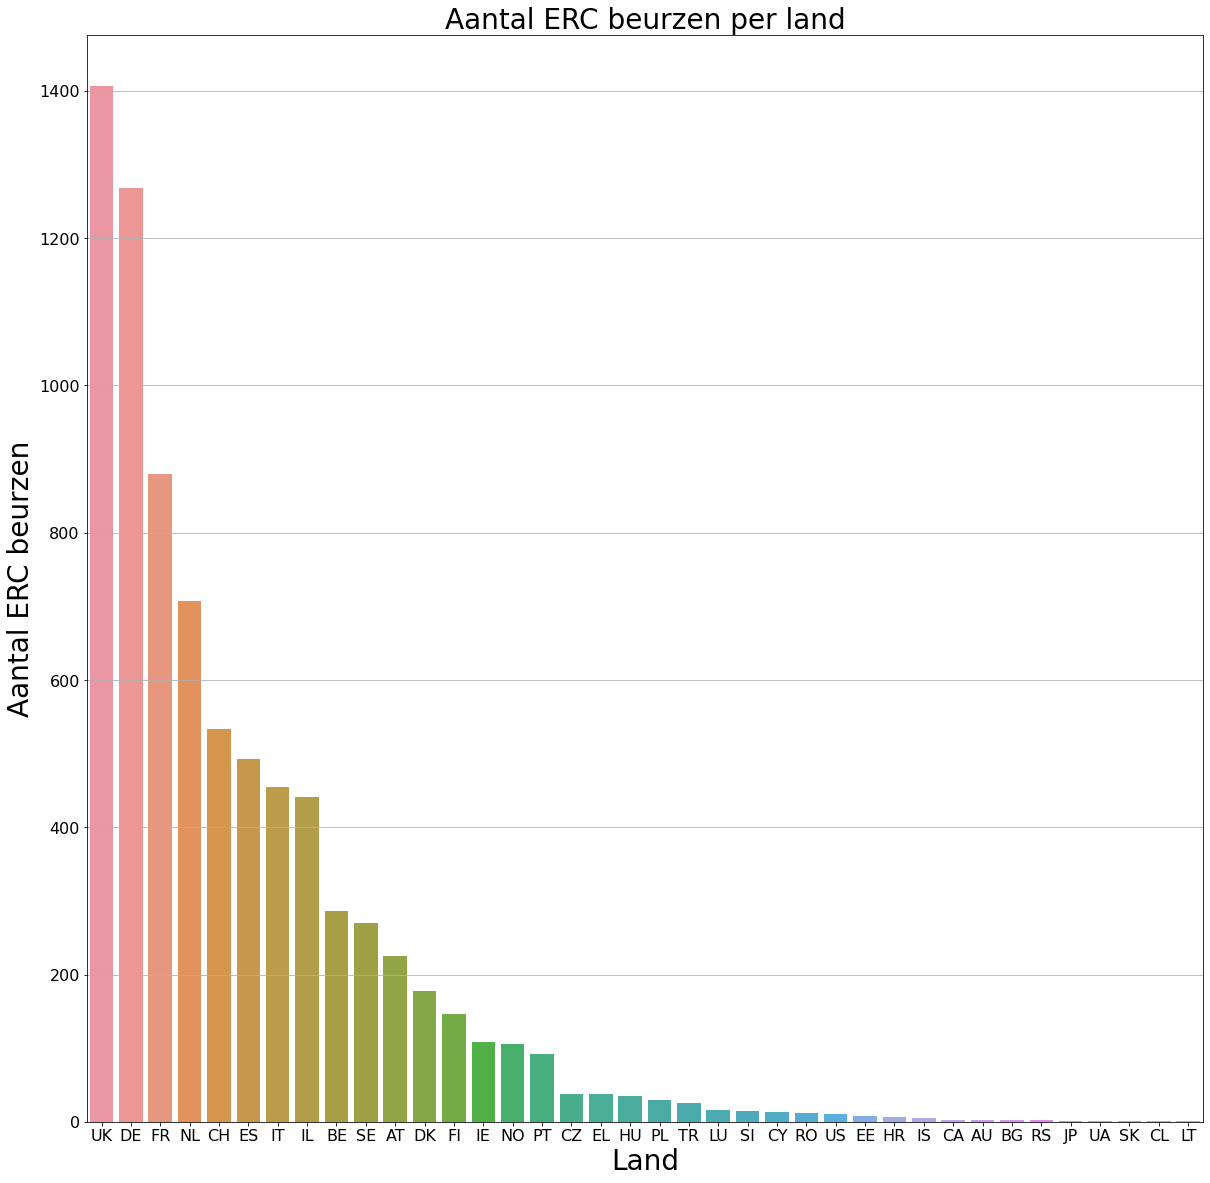

In [8]:
#Maak figuur van het aantal ERC beurzen per land
plt.figure(figsize=(20,20))
xas = country_value['index']
yas = country_value['Country']
sns.barplot(data=df, x=xas, y=yas);
plt.title("Aantal ERC beurzen per land", fontsize=28)
plt.xlabel("Land",fontsize=28)
plt.xticks(fontsize=16)
plt.ylabel("Aantal ERC beurzen", fontsize=28)
plt.yticks(fontsize=16)
plt.grid(axis = 'y')

### Conclusie vraag:
Op basis van de tabel en grafiek blijkt dat de meeste beurzen gaan naar: 
- Het verenigd Koninkrijk (UK): 1406 beurzen
- Duitsland (DE): 2068 beurzen
- Frankrijk (FR): 879 beurzen

Nederland staat op de vierde plek met 707 toegekende beurzen.
Het gaat hierbij om alle 5 typen ERC beurzen. 

## Voor welke panels haalt Nederland de meeste beurzen binnen? Ofwel, in welke onderzoeksgebieden presteren we het beste?
Om dit uit te zoeken moeten we de lijst filteren op Nederland en dan filteren op de verschillende Topics. 

De namen van de topics/panels zijn erg lang. Dit maakt het later lastig hier goede grafieken van te maken, omdat de labels dan niet te lezen zijn. Eigenlijk wil ik alleen de codes (bijv. SH2) van het panel toevoegen als een aparte kolom, om deze data in grafieken te kunnen gebruiken. Om dit te doen zoek ik de panelcode uit het begin van de tekst met een Regex en voeg ik de gevonden data toe als nieuwe kolom in de grafiek

In [9]:
#voeg code uit topic toe als nieuwe kolom Topic_code
df2['Topic_code'] = df2['Topic'].str.extract('([SLP][HSE]\d.)', expand=True)
df2.head()

,Project acronym,Project title,Abstract,PI,Grant type,Topic,Project budget,Call ID,Host Institution,City,Country,Topic_code
2,BioCom4SavEn,Bioinspired Composites Strategies for Saving E...,Saving energy together with energy harvesting ...,STACHEWICZ Urszula,Starting grants,PE8 - Products & processes engineering,1.694.375,ERC-2020-STG,AGH University of Science and Technology Krakow,Krakow,PL,PE8
3,PRAGMA,Pragmatics of Multiwinner Voting: Algorithms a...,This proposal is in the area of computational ...,FALISZEWSKI Piotr,Consolidator grants,PE6 - Computer science & informatics,1.386.290,ERC-2020-COG,AGH University of Science and Technology Krakow,Krakow,PL,PE6
5,AArteMIS,Aneurysmal Arterial Mechanics: Into the Structure,"The rupture of an Aortic Aneurysm (AA), which ...",Badel Pierre Joseph,Starting grants,PE8 - Products & processes engineering,1.499.783,ERC-2014-STG,ARMINES - Association for Research and Develop...,Paris,FR,PE8
6,BIOLOCHANICS,Localization in biomechanics and mechanobiolog...,"Rupture of Aortic Aneurysms (AA), which kills ...",Avril Stéphane Henri Anatole,Consolidator grants,PE8 - Products & processes engineering,1.999.396,ERC-2014-CoG,ARMINES - Association for Research and Develop...,Paris,FR,PE8
7,ECLIPSE,Exotic superconducting CIrcuits to Probe and p...,"Quantum systems can occupy peculiar states, su...",Leghtas Zaki,Starting grants,PE3 - Condensed matter physics,1.498.875,ERC-2019-STG,ARMINES - Association for Research and Develop...,Paris,FR,PE3


Daarna ga ik bekijken voor welke topics Nederland de meest beurzen behaald. 

In [10]:
#filter data op NL en bekijk het aantal values per topic
filterNL = df2[df2['Country'] == "NL"]
filterNL.Topic.value_counts()

SH2 - Institutions, values, environment & space              57
SH4 - The human mind and its complexity                      54
SH3 -  The social world, diversity, population               52
LS7 - Applied medical technologies                           46
PE5 - Synthetic chemistry & materials                        34
PE8 - Products & processes engineering                       32
SH5 - Cultures & cultural production                         31
PE3 - Condensed matter physics                               25
PE7 - Systems & communication engineering                    25
PE4 - Physical & analytical chemical science                 20
PE9 - Universe sciences                                      20
PE10 - Earth System Science                                  20
PE2 - Fundamental constituents of matter                     19
LS2 - Genetics                                               18
SH6 - The study of the human past                            17
LS4 - Physiology, Pathophysiology and En

Hierna wil ik deze data ook als grafiek laten zien. Voor de grafiek gebruik ik de nieuw gemaakt kolom met de topic code omdat die korter is dan de volledige topic tekst. 

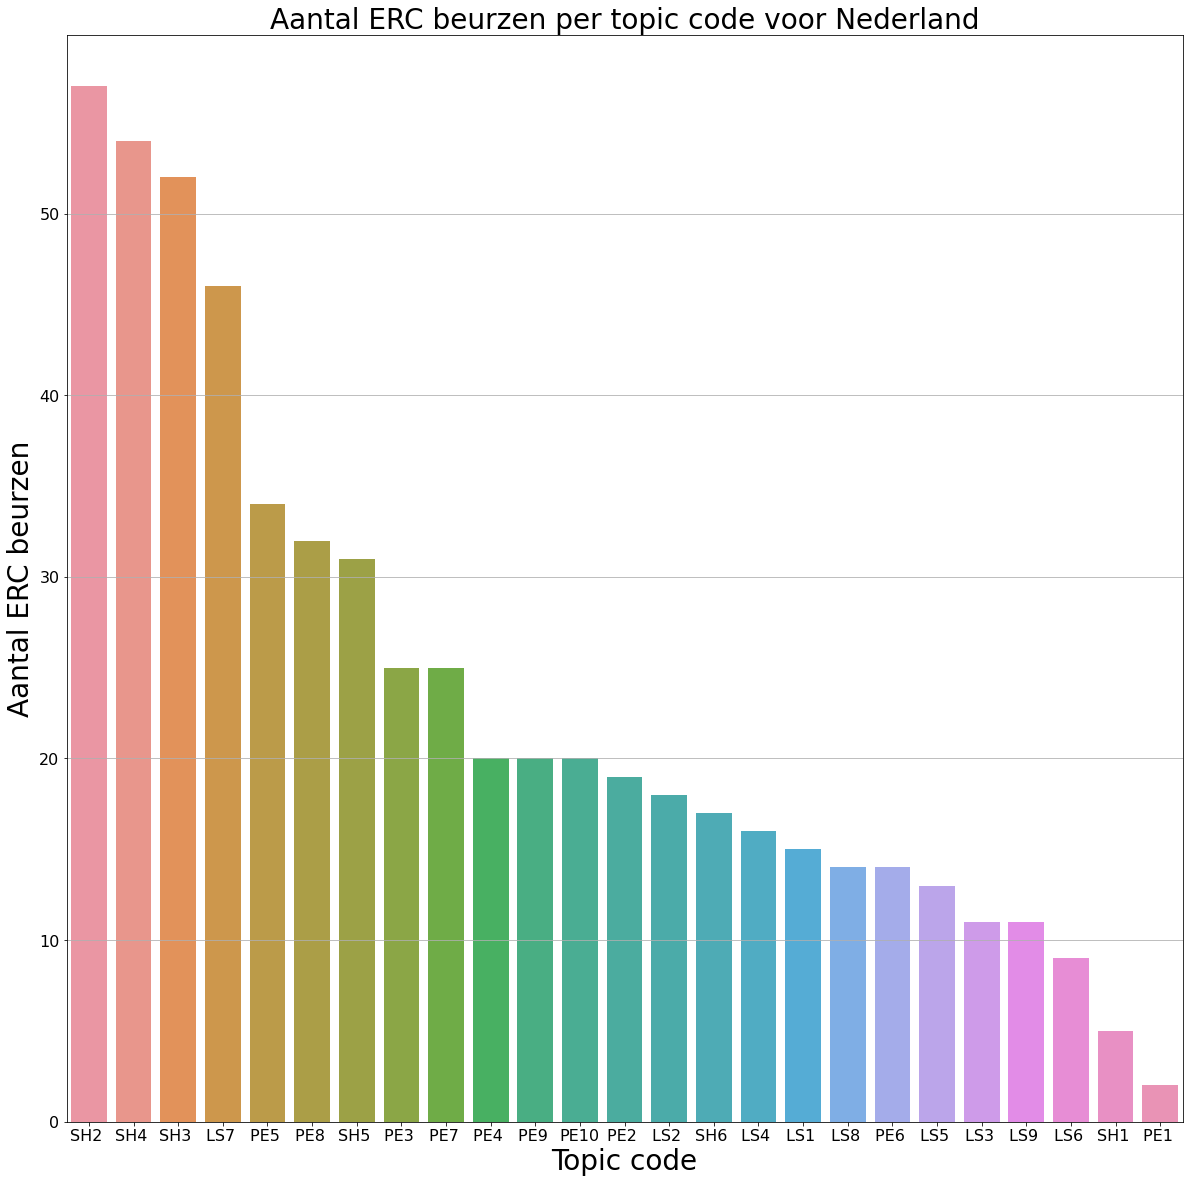

In [11]:
#maak grafiek van het aantal beurzen per topic_code 
topic_countNL = filterNL.Topic_code.value_counts().reset_index()
plt.figure(figsize=(20,20))
xas = topic_countNL['index']
yas = topic_countNL['Topic_code']
sns.barplot(data=df2, x=xas, y=yas);
plt.title("Aantal ERC beurzen per topic code voor Nederland", fontsize=28);
plt.xlabel("Topic code", fontsize=28);
plt.xticks(fontsize=16);
plt.grid(axis = 'y');
plt.ylabel("Aantal ERC beurzen", fontsize=28);
plt.yticks(fontsize=16);

### Conclusie vraag:
Onderzoekers in Nederland hebben de meeste beurzen opgehaald binnen de evaluatiepanels: 
- SH2 - Institutions, values, environment & space:             57 beurzen
- SH4 - The human mind and its complexity:                     54 beurzen
- SH3 - The social world, diversity, population:              52 beurzen

Van de ERC website heb ik de bijbehorende vakgebieden gezocht:  
SH2: Political science, international relations, law, Human geography, demography, health, sustainability science, territorial planning, spatial analysis.
SH4: Cognitive science, psychology, linguistics, theoretical philosophy. 
SH3: Sociology, social psychology, social anthropology, education sciences, communication studies.

Nederlandse onderzoekers hebben de minste beurzen opgehaald in de panels: 
- PE1 - Mathematics:                                             2 beurzen
- SH1 - Individuals, markets & organisations:                    5 beurzen
- LS6 - Immunity and infection:                                  9 beurzen

Hierbij horen de vakgebieden:
PE1: All areas of mathematics, pure and applied, plus mathematical foundations of computer science, mathematical physics and statistics.
SH1: Economics, finance, management.
LS6: The immune system, related disorders and their mechanisms, biology of infectious agents and infection. 


## Hoe is dit te vergelijken met een aantal andere Europese landen die goed scoren binnen dit programma (het VK, Duitsland, Frankrijk). In welke panels presteren zij het beste?
Nu ga ik hetzelfde bekijken voor het VK, Duitsland en Frankrijk om te zien in welke vakgebieden zij het meest succesvol zijn. Daarna vergelijk ik de data met elkaar in een subplot. 

In [12]:
#filter op topic voor het Verenigd Koninkrijk
filterUK = df2[df2['Country'] == "UK"]
filterUK.Topic.value_counts()

SH4 - The human mind and its complexity                      81
SH2 - Institutions, values, environment & space              74
SH1 - Individuals, markets & organisations                   67
LS8 - Ecology, evolution and environmental biology           63
PE5 - Synthetic chemistry & materials                        60
PE10 - Earth System Science                                  59
SH5 - Cultures & cultural production                         59
SH3 -  The social world, diversity, population               59
PE9 - Universe sciences                                      53
SH6 - The study of the human past                            52
PE1 - Mathematics                                            48
PE2 - Fundamental constituents of matter                     46
PE8 - Products & processes engineering                       46
PE3 - Condensed matter physics                               45
PE6 - Computer science & informatics                         43
LS5 - Neurosciences and Neural Disorders

In [13]:
#filter op topic voor Duitsland
filterDE = df2[df2['Country'] == "DE"]
filterDE.Topic.value_counts()

PE5 - Synthetic chemistry & materials                        81
PE2 - Fundamental constituents of matter                     78
PE6 - Computer science & informatics                         63
LS5 - Neurosciences and Neural Disorders                     61
PE4 - Physical & analytical chemical science                 55
PE3 - Condensed matter physics                               54
LS4 - Physiology, Pathophysiology and Endocrinology          53
LS6 - Immunity and infection                                 51
LS9 - Biotechnology & molecular & Biosystems Engineering     50
LS1 - Molecular biology                                      48
SH4 - The human mind and its complexity                      48
LS7 - Applied medical technologies                           45
PE8 - Products & processes engineering                       44
LS3 - Cell biology                                           39
SH6 - The study of the human past                            38
PE10 - Earth System Science             

In [14]:
#filter op topic voor Frankrijk
filterFR = df2[df2['Country'] == "FR"]
filterFR.Topic.value_counts()

PE1 - Mathematics                                            50
PE3 - Condensed matter physics                               50
PE10 - Earth System Science                                  49
PE2 - Fundamental constituents of matter                     42
PE9 - Universe sciences                                      41
PE6 - Computer science & informatics                         40
PE7 - Systems & communication engineering                    40
LS5 - Neurosciences and Neural Disorders                     39
PE8 - Products & processes engineering                       37
PE5 - Synthetic chemistry & materials                        31
LS8 - Ecology, evolution and environmental biology           30
LS3 - Cell biology                                           28
LS7 - Applied medical technologies                           27
PE4 - Physical & analytical chemical science                 27
LS6 - Immunity and infection                                 26
LS1 - Molecular biology                 

Nadat ik de data heb gefilterd en bekeken voor de 4 landen, ga ik deze plotten in een subplot met 4 grafieken. 

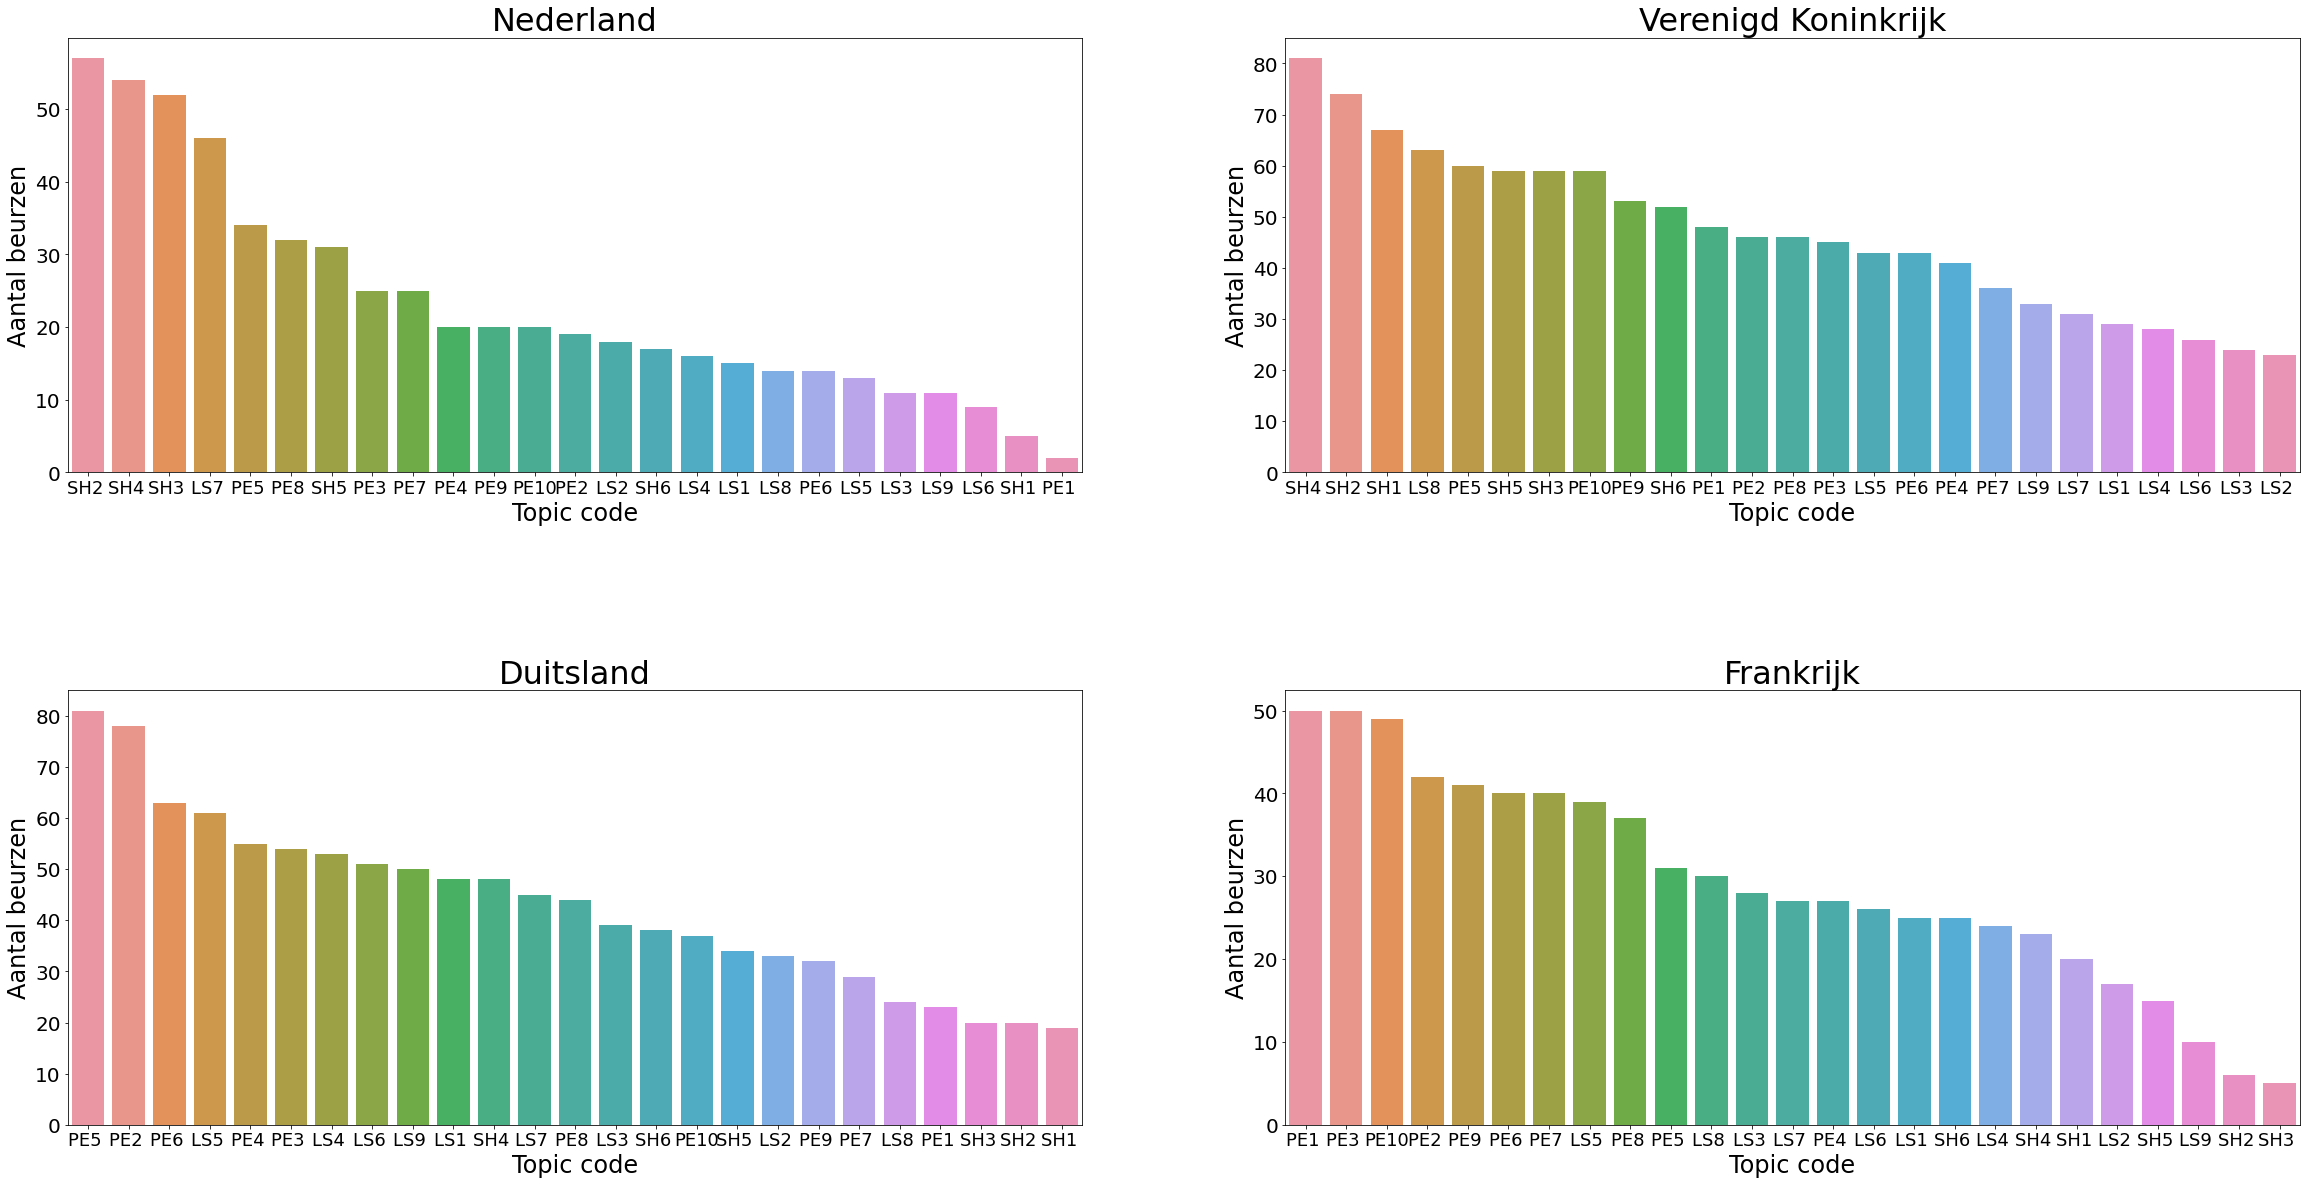

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(40,20))

#plot Nederland
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.5)
topic_countNL = filterNL.Topic_code.value_counts().reset_index()
xas = topic_countNL['index']
yas = topic_countNL['Topic_code']
sns.barplot(data=df, x=xas, y=yas);
plt.grid(axis = 'y')
plt.title("Nederland", fontsize=32)
plt.xlabel("Topic code", fontsize=24)
plt.xticks(fontsize=18);
plt.grid(axis = 'y')
plt.ylabel("Aantal beurzen", fontsize=24)
plt.yticks(fontsize=20);

#plot VK
plt.subplot(2,2,2)
topic_countUK = filterUK.Topic_code.value_counts().reset_index()
xas = topic_countUK['index']
yas = topic_countUK['Topic_code']
sns.barplot(data=df, x=xas, y=yas);
plt.grid(axis = 'y')
plt.title("Verenigd Koninkrijk", fontsize=32)
plt.xlabel("Topic code", fontsize=24)
plt.xticks(fontsize=18);
plt.grid(axis = 'y')
plt.ylabel("Aantal beurzen", fontsize=24)
plt.yticks(fontsize=20)

#plot Duitsland
plt.subplot(2,2,3)
topic_countDE = filterDE.Topic_code.value_counts().reset_index()
xas = topic_countDE['index']
yas = topic_countDE['Topic_code']
sns.barplot(data=df, x=xas, y=yas);
plt.grid(axis = 'y')
plt.title("Duitsland", fontsize=32)
plt.xlabel("Topic code", fontsize=24)
plt.xticks(fontsize=18);
plt.grid(axis = 'y')
plt.ylabel("Aantal beurzen", fontsize=24)
plt.yticks(fontsize=20);

#plot Frankrijk
plt.subplot(2,2,4)
topic_countFR = filterFR.Topic_code.value_counts().reset_index()
xas = topic_countFR['index']
yas = topic_countFR['Topic_code']
sns.barplot(data=df, x=xas, y=yas);
plt.grid(axis = 'y')
plt.title("Frankrijk", fontsize=32)
plt.xlabel("Topic code", fontsize=24)
plt.xticks(fontsize=18);
plt.grid(axis = 'y')
plt.ylabel("Aantal beurzen", fontsize=24)
plt.yticks(fontsize=20);

### Conclusie vraag: 
Uit de grafieken blijkt dat er grote verschillen zijn tussen de sterkste vakgebieden voor de 4 best presterende landen bij ERC. Voor Nederland liggen de sterke vakgebieden in de sociale- en geesteswetenschappen. Dit geldt ook voor het Verenigd Koninkrijk. Wel presteert het Verenigd Koninkrijk ook goed in de vakgebieden uit SH1: Economics, finance, management, terwijl dit voor Nederland geen sterk vakgebied is. 

Duitsland en Frankrijk presteren het beste in de Physical Science and Engineering. Zowel Duitsland als Frankrijk presteren relatief slecht in de vakgebieden van SH2 en SH3, terwijl dit voor Nederland juist de sterkste vakgebieden zijn. Frankrijk presteert het allerbest in de wiskunde, terwijl dit voor Nederland het zwakste vakgebied is qua ERC prestaties. 

## Hoeveel grants heeft Nederland behaalt per universiteit/onderzoeksinstituut? 
Nu ga ik kijken naar de best presterende kennisinstellingen van Nederland. Ik wil daarna de hosts met de aantallen plotten op een kaart van Nederland. Hiervoor moet ik coordinaten van de hostinstellingen opzoeken op internet. 

In [16]:
#bekijk het aantal beurzen per host in nederland 
filterNLdf = df[df['Country'] == "NL"]
filterNLdf["Host Institution"].value_counts()

University of Amsterdam                                     78
Delft University of Technology                              75
Utrecht University                                          67
Leiden University                                           59
Radboud University Nijmegen                                 58
Free University and Medical Center Amsterdam (VU-VUmc)      48
Eindhoven University of Technology                          39
University of Twente                                        34
University of Groningen                                     33
Maastricht University                                       26
University Medical Center Utrecht                           21
Netherlands Foundation of Scientific Research Institutes    20
Royal Netherlands Academy of Arts and Sciences              19
Academic Medical Center of the University of Amsterdam      19
Leiden University Medical Center                            18
Wageningen University                                  

Als we naar deze data kijken, zien we dat het VUMC er twee keer in voorkomt. Dit komt omdat ze in de periode 2014-2020 zijn gesplitst. Vroeger werden de beurzen voor VU en VUMC samen geteld (de 48 beurzen van VU-VUmC). Van die 48 is niet te zeggen welke voor de VU waren en welke voor het VUmc. Momenteel worden de VUmc beurzen wel apart geteld. Voor verwerken van deze data tel ik de VUMC beurzen op bij die van de combinatie VU-VUmc. 

In [17]:
df["Host Institution"] = df['Host Institution'].replace('Free University Medical Center Amsterdam (VUmc)','Free University and Medical Center Amsterdam (VU-VUmc)')

Ik wil deze data plotten op een kaart van Nederland. Hiervoor heb ik de coordinaten van de universiteiten opgezocht via de website Coordinatenbepalen.nl. Een deel van de data heb ik op een makkelijke manier in een csv kunnen opslaan. Ik heb helaas niet meteen alle data kunnen vinden, maar wel een deel. Ik lees deze csv in als dataframe.

In [18]:
#inlezen csv met gevonden coordinaten
df_coordinaten = pd.read_csv('coordinaten_hosts.csv', sep=";")
df_coordinaten

,Naam,Breedtegraad (latitude),Lengtegraad (longitude)
0,Imec the Netherlands,NaN,NaN
1,KWR Water Research Institute,NaN,NaN
2,Sanquin,14.581732,-86.778640
3,Radboud University Medical Centre,NaN,NaN
4,Cenya Imaging,NaN,NaN
5,Princess Maxima Centre for Pediatric Oncology,NaN,NaN
6,University Medical Center Groningen,NaN,NaN
7,Tilburg University,51.563141,5.041974
8,Netherlands Cancer Institute,52.349445,4.825326
9,Erasmus Medical Center Rotterdam,NaN,NaN


Daarna voeg ik aan deze dataframe een kolom toe met het aantal beurzen per universiteit.

In [19]:
#Maak dictionary van valuecounts per uni
host_aantal = df["Host Institution"].value_counts().to_dict()
#nieuwe kolom 'aantal beurzen' aanmaken in df_coordinaten 
df_coordinaten["Aantal_Beurzen"] = df_coordinaten["Naam"]
#vervangen waarden voor waarden uit dictionary host_aantal.
df_coordinaten["Aantal_Beurzen"] = df_coordinaten['Aantal_Beurzen'].map(host_aantal)
#de csv geeft de coordinaten van de instellingen in andere volgende (eerst host institute met laagste aantal beurzen), ik draai de dataframe om de data beter te kunnen bekijken. 
df_coordinaten.reindex(index=df_coordinaten.index[::-1])

,Naam,Breedtegraad (latitude),Lengtegraad (longitude),Aantal_Beurzen
26,University of Amsterdam,52.368133,4.889804,78.0
25,Delft University of Technology,51.998827,4.373960,75.0
24,Utrecht University,52.085162,5.174106,67.0
23,Leiden University,52.168634,4.459663,59.0
22,Radboud University Nijmegen,51.821517,5.863403,58.0
21,Free University and Medical Center Amsterdam (...,NaN,NaN,55.0
20,Eindhoven University of Technology,51.448660,5.490400,39.0
19,University of Twente,52.223386,6.885423,34.0
18,University of Groningen,53.219678,6.562515,33.0
17,Maastricht University,50.849375,5.694609,26.0


Voor alle hosts waarvan de coordinaten nog ontbreken ga ik de coordinaten op een andere website opzoeken en toevoegen. Daarnaast kloppen de gevonden coordinaten voor Sanquin niet, deze coordinaten liggen niet in Nederland. Deze pas ik aan. 

In [20]:
#Coordinaten VU toevoegen
df_coordinaten.at[21, 'Breedtegraad (latitude)'] = 52.33396225
df_coordinaten.at[21, 'Lengtegraad (longitude)'] = 4.86519650073731
#Coordinaten NWO toevoegen (NWO hoofdvestiging, beurzen zijn verspreid over instituten door Nederland)
df_coordinaten.at[15, 'Breedtegraad (latitude)'] = 52.080475
df_coordinaten.at[15, 'Lengtegraad (longitude)'] = 4.344405
#Coordinaten KNAW toevoegen (KNAW hoofdvestiging, beurzen zijn verspreid over instituten door Nederland)
df_coordinaten.at[14, 'Breedtegraad (latitude)'] = 52.3713075
df_coordinaten.at[14, 'Lengtegraad (longitude)'] = 4.8972712
#Coordinaten AMC toevoegen
df_coordinaten.at[13, 'Breedtegraad (latitude)'] = 52.2924635
df_coordinaten.at[13, 'Lengtegraad (longitude)'] = 4.95657659588471
#Coordinaten LUMC toevoegen
df_coordinaten.at[12, 'Breedtegraad (latitude)'] = 52.16619895
df_coordinaten.at[12, 'Lengtegraad (longitude)'] = 4.47740050079027
#Coordinaten Erasmus MC toevoegen
df_coordinaten.at[9, 'Breedtegraad (latitude)'] = 51.9108881
df_coordinaten.at[9, 'Lengtegraad (longitude)'] = 4.4656654
#Coordinaten UMCG toevoegen
df_coordinaten.at[6, 'Breedtegraad (latitude)'] = 53.22310875
df_coordinaten.at[6, 'Lengtegraad (longitude)'] = 6.57414025254999
#Coordinaten Prinses Maxima Ziekenhuis toevoegen
df_coordinaten.at[5, 'Breedtegraad (latitude)'] = 52.0902735
df_coordinaten.at[5, 'Lengtegraad (longitude)'] = 5.1837173
#Coordinaten Cenya imaging toevoegen
df_coordinaten.at[4, 'Breedtegraad (latitude)'] = 51.9577704
df_coordinaten.at[4, 'Lengtegraad (longitude)'] = 5.8340318
#Coordinaten Radboud UMC toevoegen
df_coordinaten.at[3, 'Breedtegraad (latitude)'] = 51.8235761
df_coordinaten.at[3, 'Lengtegraad (longitude)'] = 5.8589925
#Coordinaten KWR toevoegen
df_coordinaten.at[1, 'Breedtegraad (latitude)'] = 52.0185656
df_coordinaten.at[1, 'Lengtegraad (longitude)'] = 5.1064104
#Coordinaten IMEC toevoegen
df_coordinaten.at[0, 'Breedtegraad (latitude)'] = 51.4135968
df_coordinaten.at[0, 'Lengtegraad (longitude)'] = 5.4541213
#Coordinaten Sanquin wijzigen
df_coordinaten.at[2, 'Breedtegraad (latitude)'] = 51.8234858
df_coordinaten.at[2, 'Lengtegraad (longitude)'] = 5.8646124

Nu heb ik een complete dataframe met coordinaten die ik op een kaart van Nederland kan plotten, genaamd df_coordinaten. 

In [21]:
df_coordinaten

,Naam,Breedtegraad (latitude),Lengtegraad (longitude),Aantal_Beurzen
0,Imec the Netherlands,51.413597,5.454121,1.0
1,KWR Water Research Institute,52.018566,5.106410,1.0
2,Sanquin,51.823486,5.864612,1.0
3,Radboud University Medical Centre,51.823576,5.858993,NaN
4,Cenya Imaging,51.957770,5.834032,2.0
5,Princess Maxima Centre for Pediatric Oncology,52.090274,5.183717,5.0
6,University Medical Center Groningen,53.223109,6.574140,9.0
7,Tilburg University,51.563141,5.041974,11.0
8,Netherlands Cancer Institute,52.349445,4.825326,11.0
9,Erasmus Medical Center Rotterdam,51.910888,4.465665,14.0


Ik plot deze data op de kaart van Nederland. 

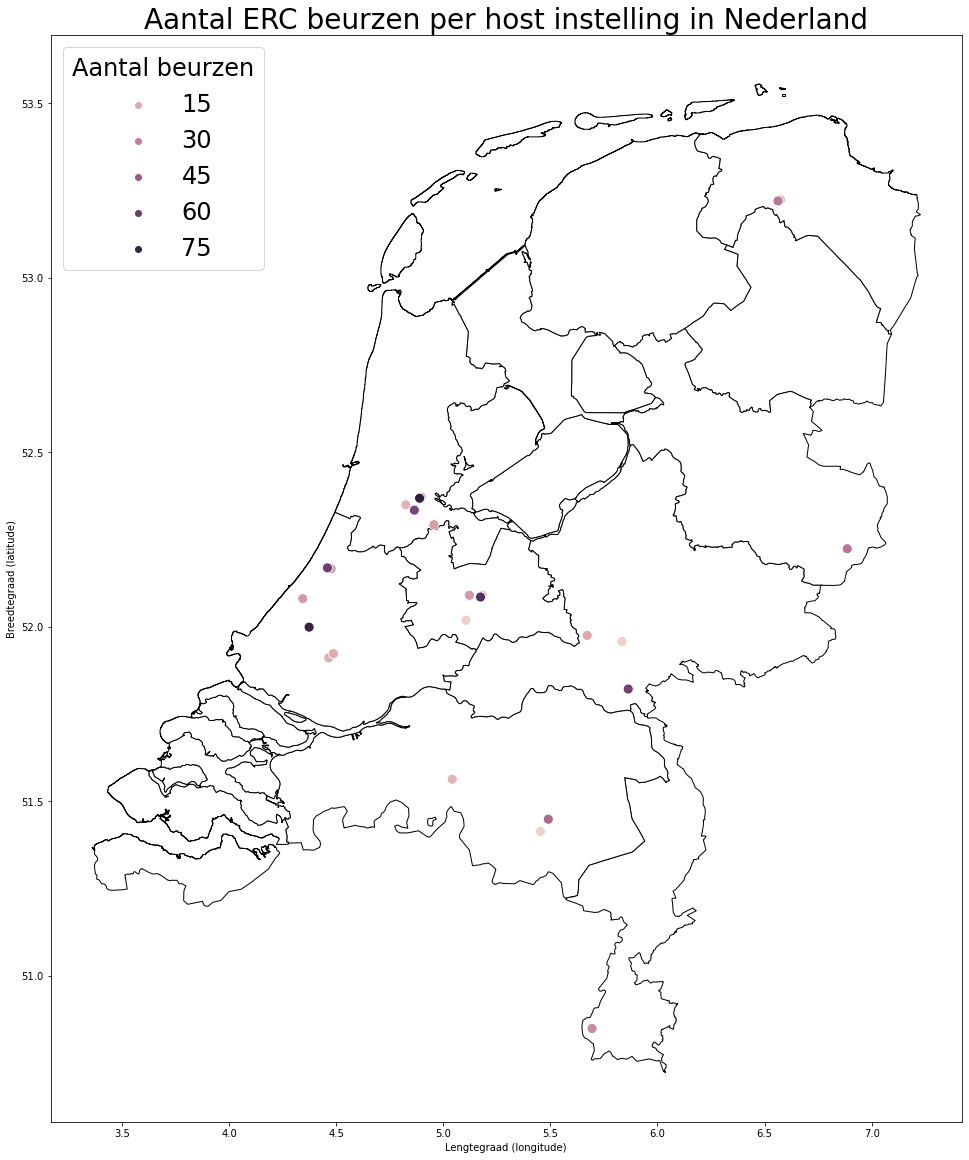

In [22]:
#Laad kaart van Nederland
mapdf = geopandas.read_file("https://stacks.stanford.edu/file/druid:st293bj4601/data.zip")

#Plot de figuur 
f, ax = plt.subplots(1, figsize=(20, 20))
ax = mapdf.plot(color='white', edgecolor='black', ax=ax)
sns.scatterplot(x=df_coordinaten['Lengtegraad (longitude)'], y=df_coordinaten['Breedtegraad (latitude)'], hue=df_coordinaten["Aantal_Beurzen"], s=100)
plt.title("Aantal ERC beurzen per host instelling in Nederland", fontsize=28)
plt.legend(title='Aantal beurzen', fontsize=24, title_fontsize=24);

### Conclusie vraag: 
De top 5 host instellingen in Nederland met de meeste ERC beurzen zijn: 
- University of Amsterdam, 78 beurzen
- Delft University of Technology, 75 beurzen
- Utrecht University, 67 beurzen
- Leiden University, 59 beurzen
- Radboud University Nijmegen, 58 beurzen

## Welke instellingen uit Europa hebben de meeste grants behaald? (top 15)
Nu ga ik bekijken welke 15 instellingen uit Europa de meeste beurzen hebben binnengehaald. 

In [23]:
df["Host Institution"].value_counts().nlargest(15)

National Centre for Scientific Research (CNRS)                413
Max Planck Society                                            184
University of Oxford                                          176
University of Cambridge                                       171
Swiss Federal Institute of Technology Zurich (ETH Zurich)     146
Weizmann Institute                                            133
University College London                                     124
Swiss Federal Institute of Technology Lausanne (EPFL)         105
Tel Aviv University                                            98
University of Edinburgh                                        91
University of Copenhagen                                       89
THE HEBREW UNIVERSITY OF JERUSALEM                             89
University of Munich (LMU)                                     86
Imperial College                                               82
National Institute of Health and Medical Research (INSERM)     79
Name: Host

### Conclusie vraag: 
Als we kijken naar de instellingen uit heel Europa zien we dat CNRS verruit de allermeeste beurzen heeft behaald. Op basis van mijn kennis van de data weet ik dat dit een vertekend beeld geeft. CNRS is de grootste Franse overheidsorganisatie voor wetenschappelijk onderzoek. Onder het CNRS vallen een hele hoop verschillende onderzoeksinstituten. Als deze instituten een ERC aanvraag indienen, doen ze dit allemaal via de hoofdorganisatie. Als we de aantallen gewonnen beurzen los per CNRS instituut zouden bekijken, zou de data er dus anders uit zien. Het is met deze dataset niet mogelijk om de CNRS data uit te splitsen voor de verschillende CNRS instituten. Hetzelfde geldt voor Max Planck Society. De Max-Planck Society heeft 80 instituten voor verschillende wetenschappelijke disciplines, verspreid over Duitsland. De overige instellingen uit de top 15 zijn wel universiteiten of indviduele onderzoeksinstellingen. De meeste van deze instellingen liggen in het Verenigd Koninkrijk, Zwitserland of Israël. 

## Wat is het gemiddelde toegekende bedrag per grant bekeken per type grant StG, CoG en AdG
Per beurstype kan men een verschillend maximaal projectbudget aanvragen. Voor de Starting Grant is dit maximaal 1,5 miljoen euro, voor de Consolidator Grant 2 miljoen euro en voor de Advanced Grant 2,5 miljoen euro. 

Om met dit budget te kunnen rekenen moet ik eerst bekijken of het budget al in het juiste datatype staat. Vanwege de punten en komma's in het budget verwacht ik van niet. 

In [24]:
#bekijken of het budget al in int of float staat
df2.dtypes

Project acronym     object
Project title       object
Abstract            object
PI                  object
Grant type          object
Topic               object
Project budget      object
Call ID             object
Host Institution    object
City                object
Country             object
Topic_code          object
dtype: object

Het budget staat niet als cijfer in de data maar als object. Dat betekent dat er dus nog niet mee gerekend kan worden. Omdat er punten in de getallen staan, kan de kolom ook niet automatisch worden omgezet naar een integer of float. Daarom moeten eerst de punten uit het getal worden gehaald.

In [25]:
# punten uit budget halen
df2['Project budget'] = df2['Project budget'].str.replace('.','')
# komma's veranderen in punt voor het omzetten in float
df2['Project budget'] = df2['Project budget'].str.replace(',','.')
# Object veranderen in float
df2['Project budget'] = df2['Project budget'].astype(float, errors = 'raise')
df2.head()

,Project acronym,Project title,Abstract,PI,Grant type,Topic,Project budget,Call ID,Host Institution,City,Country,Topic_code
2,BioCom4SavEn,Bioinspired Composites Strategies for Saving E...,Saving energy together with energy harvesting ...,STACHEWICZ Urszula,Starting grants,PE8 - Products & processes engineering,1694375.0,ERC-2020-STG,AGH University of Science and Technology Krakow,Krakow,PL,PE8
3,PRAGMA,Pragmatics of Multiwinner Voting: Algorithms a...,This proposal is in the area of computational ...,FALISZEWSKI Piotr,Consolidator grants,PE6 - Computer science & informatics,1386290.0,ERC-2020-COG,AGH University of Science and Technology Krakow,Krakow,PL,PE6
5,AArteMIS,Aneurysmal Arterial Mechanics: Into the Structure,"The rupture of an Aortic Aneurysm (AA), which ...",Badel Pierre Joseph,Starting grants,PE8 - Products & processes engineering,1499783.0,ERC-2014-STG,ARMINES - Association for Research and Develop...,Paris,FR,PE8
6,BIOLOCHANICS,Localization in biomechanics and mechanobiolog...,"Rupture of Aortic Aneurysms (AA), which kills ...",Avril Stéphane Henri Anatole,Consolidator grants,PE8 - Products & processes engineering,1999396.0,ERC-2014-CoG,ARMINES - Association for Research and Develop...,Paris,FR,PE8
7,ECLIPSE,Exotic superconducting CIrcuits to Probe and p...,"Quantum systems can occupy peculiar states, su...",Leghtas Zaki,Starting grants,PE3 - Condensed matter physics,1498875.0,ERC-2019-STG,ARMINES - Association for Research and Develop...,Paris,FR,PE3


Nu bekijk ik of de data inderdaad is aangepast. 

In [26]:
df2.dtypes

Project acronym      object
Project title        object
Abstract             object
PI                   object
Grant type           object
Topic                object
Project budget      float64
Call ID              object
Host Institution     object
City                 object
Country              object
Topic_code           object
dtype: object

De kolom Project budget is nu een float, waardoor ik er mee kan rekenen. Ik ga nu het gemiddelde budget per beurstype berekenen. Allereerst wil ik kijken of er ook budgetten die niet goed ingevuld zijn. 

In [27]:
#Checken of er ook lege budgetten zijn
print(len(df2[df2["Project budget"] == 0]))
print(len(df2))

7
6431


Dat zijn er 7. Deze data ga ik uit het dataframe halen. 

In [28]:
df2 = df2[df2["Project budget"] != 0]
print(len(df2))

6424


In [29]:
#Print gemiddeld budget StG
print('Starting Grant gemiddeld budget:', df2["Project budget"][df2["Grant type"] == "Starting grants"].mean().round(2), 'Euro')
#Print gemiddeld budget CoG
print('Consolidator Grant gemiddeld budget:', df2["Project budget"][df2["Grant type"] == "Consolidator grants"].mean().round(2), 'Euro')
#Print gemiddeld budget AdG
print('Advanced Grant gemiddeld budget:', df2["Project budget"][df2["Grant type"] == "Advanced grants"].mean().round(2), 'Euro')

Starting Grant gemiddeld budget: 1498332.77 Euro
Consolidator Grant gemiddeld budget: 1947104.82 Euro
Advanced Grant gemiddeld budget: 2383254.77 Euro


Daarnaast is het ook interessant om te kijken of er nog grote verschillen per vakgebied zijn. Ik verwacht dat projecten uit de SH panels (Social Sciences and Humanities), over het algemeen lagere budgetten zullen hebben, omdat hier minder vaak dure apparatuur of experimenten voor nodig. 

C:\Users\marie\Desktop\Oefeningen\geopandas\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


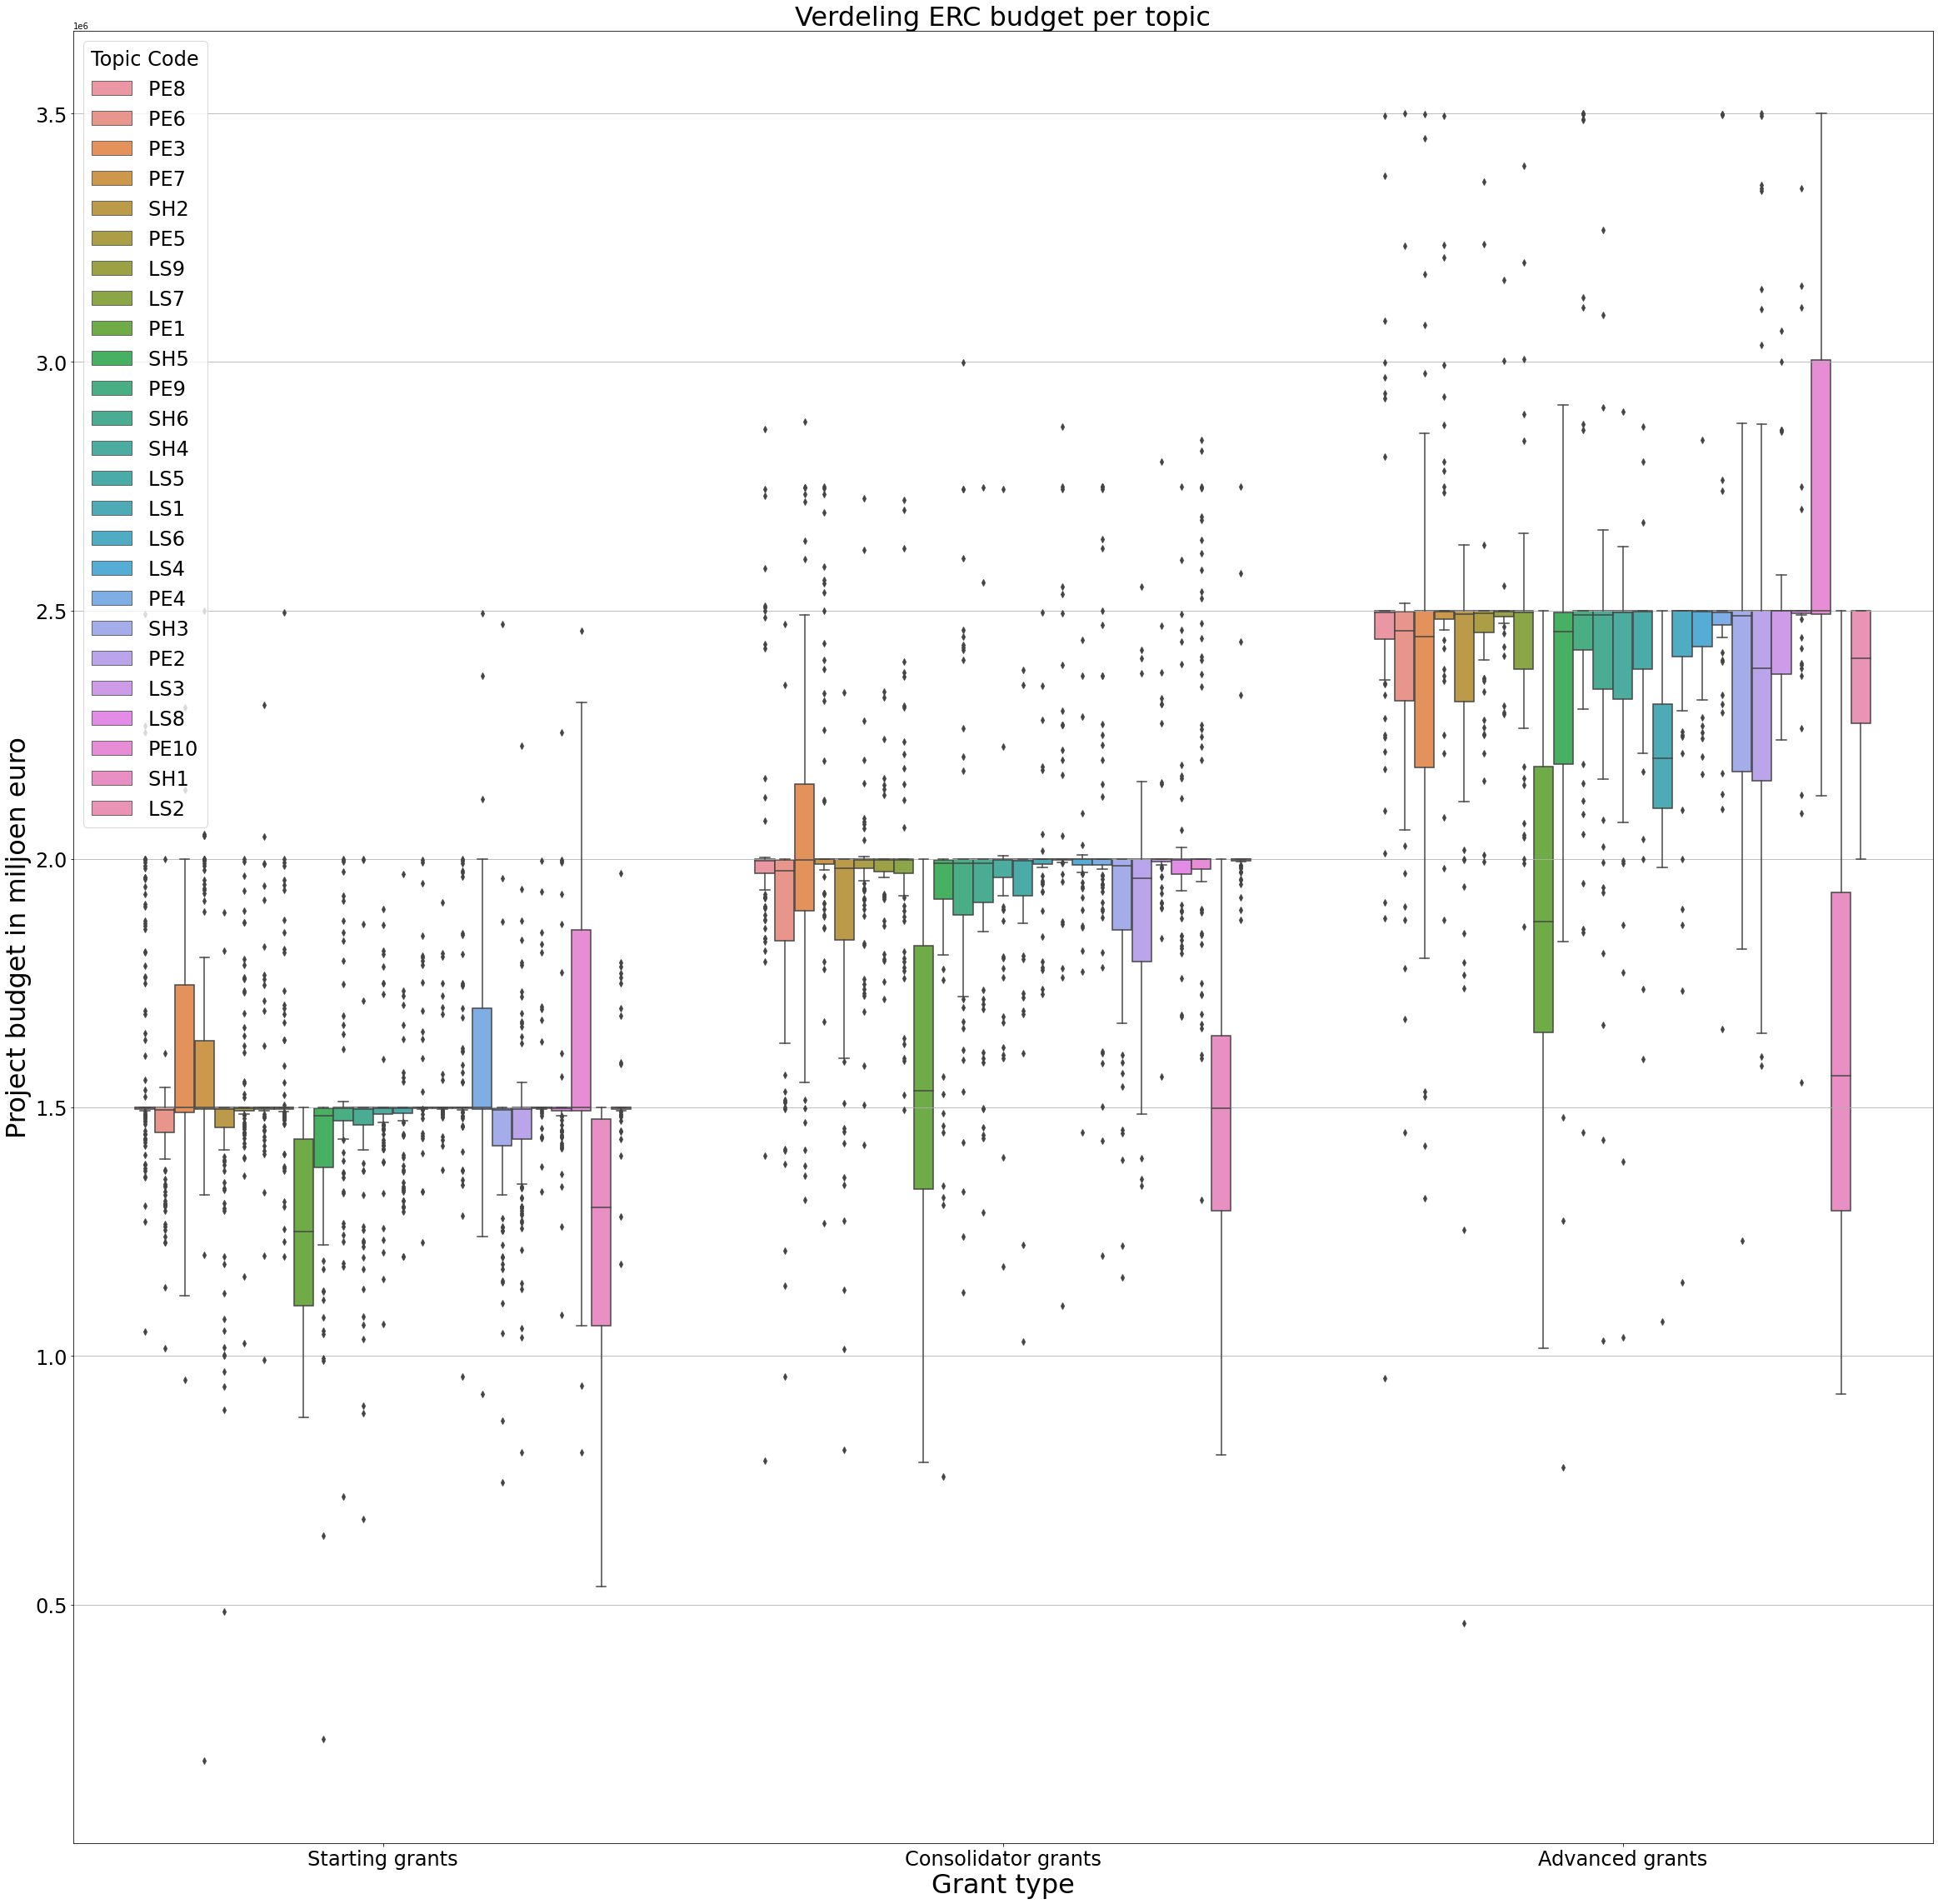

In [30]:
plt.figure(figsize=(40,40))
sns.boxplot(x="Grant type", y="Project budget", data=df2, hue="Topic_code");
plt.title("Verdeling ERC budget per topic", fontsize=32)
plt.legend(title='Topic Code', fontsize=24, title_fontsize=24)
plt.xlabel("Grant type", fontsize=32)
plt.xticks(fontsize=24);
plt.grid(axis = 'y')
plt.ylabel("Project budget in miljoen euro", fontsize=32)
plt.yticks(fontsize=24);

### Conclusie vraag
Het gemiddelde budget per beurstype is: 
- Starting Grant gemiddeld budget: 1498332,77 Euro
- Consolidator Grant gemiddeld budget: 1941065,94 Euro
- Advanced Grant gemiddeld budget: 2383254,77 Euro

Voor de panels vallen er een aantal zaken op:
- Het PE3 panel (Condensed matter physics) heeft bij de StG en CoG vaak een hoger budget dan het maximum. Het PE10 panel (Earth System Science) heeft ook veel projecten met een budget hoger dan het maximum. Waarschijnlijk zijn in deze vakgebieden vaak dure experimenten en apparatuur nodig. 
- De SH1 (economics) en PE1 (mathematics) panels hebben voor alle type beurzen vaker een budget onder het maximum aan te vragen bedrag. In deze panels worden waarschijnlijk veel theoretische projecten gefinancieerd, waar geen hoge experiment en apparatuur kosten bij komen kijken. 

## Hoeveel % van de projecten krijgt extra budget toegekend bovenop het maximale bedrag per grant? (Dit is mogelijk in bepaalde gevallen) 
Sommige projecten krijgen meer dan de 1,5 miljoen voor StG, 2 miljoen voor CoG en 2,5 miljoen voor AdG. Dit is mogelijk als ze een goede reden hebben waarom ze bijv. dure apparatuur nodig hebben in het project. Ik ga bekijken in hoeveel procent van de toegekende projecten er ook budget boven het maximum werd toegekend. 

In [31]:
#totaal aantal Starting grants in dataset
len(df2[df2["Grant type"] == "Starting grants"])

2797

In [32]:
#totaal aantal Starting grants met budget boven 1,5 miljoen
len(df2[(df2["Project budget"] > 1500000) & (df2["Grant type"] == "Starting grants")])

379

In [33]:
#bereken percentage en afronden
x = round((379*100/2797), 2)
print(x, "% van de Starting grant projecten heeft een budget van meer dan 1,5 miljoen euro")

13.55 % van de Starting grant projecten heeft een budget van meer dan 1,5 miljoen euro


In [34]:
#totaal aantal Consolidator grants in dataset
len(df2[df2["Grant type"] == "Consolidator grants"])

2250

In [35]:
#totaal aantal Consolidator grants met budget boven 2 miljoen
len(df2[(df2["Project budget"] > 2000000) & (df2["Grant type"] == "Consolidator grants")])

220

In [36]:
#bereken percentage en afronden
x = round((220*100/2250), 2)
print(x, "% van de Consolidator grant projecten heeft een budget van meer dan 2 miljoen euro")

9.78 % van de Consolidator grant projecten heeft een budget van meer dan 2 miljoen euro


In [37]:
#totaal aantal Advanced grants in dataset 
len(df2[df2["Grant type"] == "Advanced grants"])

1377

In [38]:
#totaal aantal Advanced grants in dataset met boven boven de 2,5 miljoen
len(df2[(df2["Project budget"] > 2500000) & (df2["Grant type"] == "Advanced grants")])

126

In [39]:
#bereken percentage en afronden
x = round((126*100/1377), 2)
print(x, "% van de Advanced grant projecten heeft een budget van meer dan 2,5 miljoen euro")

9.15 % van de Advanced grant projecten heeft een budget van meer dan 2,5 miljoen euro


### Conclusie vraag
- 13,55% van de Starting grant projecten kreeg meer dan 1,5 miljoen euro. 
- 9,78% van de Consolidator grant projecten kreeg meer dan 2 miljoen euro.
- 9,15% van de Advanced grant projecten kreeg meer dan 2,5 miljoen euro. 

Bij de Starting Grant is het standaard budget dus het vaakst ontoereikend om het project goed uit te kunnen voeren. 

## Hoe deed Nederland het per jaar? 
In deze vraag wil ik bekijken hoeveel beurzen Nederland per jaar heeft gewonnen in totaal en uitgesplitst voor de StG, CoG en AdG. Hiervoor is het handig om het jaar eerst uit de data te halen en in een aparte kolom te stoppen. Nu zit het jaar namelijk in de tekst uit de kolom call ID. 

In [40]:
#maak nieuwe kolom voor het call jaar
df2['Call_year'] = df2['Call ID'].str.extract('ERC-(20\d\d)', expand=True)
#filter op NL
filterNLdf2 = df2[df2['Country'] == "NL"]
filterNLdf2.head()

,Project acronym,Project title,Abstract,PI,Grant type,Topic,Project budget,Call ID,Host Institution,City,Country,Topic_code,Call_year
87,AFFORDS-HIGHER,Skilled Intentionality for 'Higher' Embodied C...,"In many situations experts act adequately, yet...",Rietveld Dirk Willem,Starting grants,SH4 - The human mind and its complexity,1499850.0,ERC-2015-STG,Academic Medical Center of the University of A...,Amsterdam,NL,SH4,2015
88,BOOTCAMP,Boosting metabolism in T cells: a tool to impr...,Chronic lymphocytic leukemia (CLL) is the most...,KATER Aron Philip,Consolidator grants,LS7 - Applied medical technologies,1997662.0,ERC-2019-COG,Academic Medical Center of the University of A...,Amsterdam,NL,LS7,2019
89,CD40-INN,CD40 goes innate: defining and targeting CD40 ...,"Atherosclerosis, the underlying cause of the m...",Lutgens Leiner Esther,Consolidator grants,"LS4 - Physiology, Pathophysiology and Endocrin...",1999420.0,ERC-2015-CoG,Academic Medical Center of the University of A...,Amsterdam,NL,LS4,2015
91,CoordinatedDopamine,Coordination of regional dopamine release in t...,The basal ganglia consist of a set of neuroana...,Willuhn Ingo,Starting grants,LS5 - Neurosciences and Neural Disorders,1500000.0,ERC-2014-STG,Academic Medical Center of the University of A...,Amsterdam,NL,LS5,2014
92,CRCStemCellDynamics,Molecular Subtype Specific Stem Cell Dynamics ...,Annually 1.2 million new cases of colorectal c...,Vermeulen Louis,Starting grants,"LS4 - Physiology, Pathophysiology and Endocrin...",1499875.0,ERC-2014-STG,Academic Medical Center of the University of A...,Amsterdam,NL,LS4,2014


Eerst maak ik grafiek voor alle beurstypen gecombineerd. 

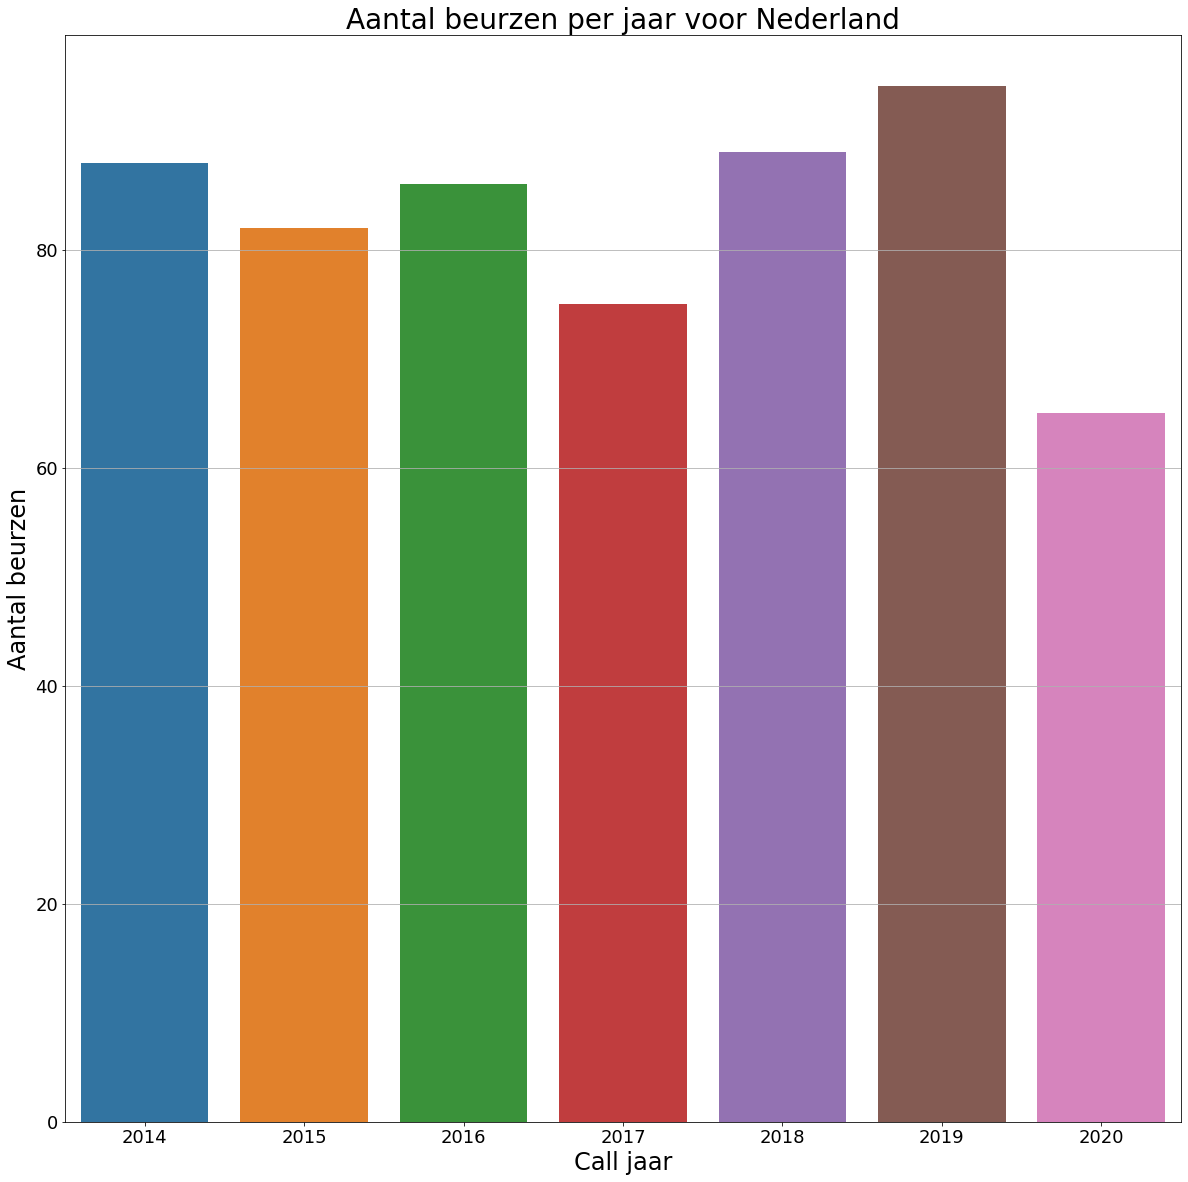

In [41]:
#Maak grafiek per jaar uitgesplitst voor alle beurzen gecombineerd
plt.figure(figsize=(20,20))
sns.countplot(data=filterNLdf2, x="Call_year", order=["2014", "2015", "2016", "2017", "2018", "2019", "2020"]);
plt.grid(axis = 'y')
plt.title("Aantal beurzen per jaar voor Nederland", fontsize=28)
plt.xlabel("Call jaar", fontsize=24)
plt.xticks(fontsize=18);
plt.ylabel("Aantal beurzen", fontsize=24);
plt.yticks(fontsize=18);

Daarna maak ik een grafiek waarbij de behaalde beurzen worden uitgesplitst naar beurstype. 

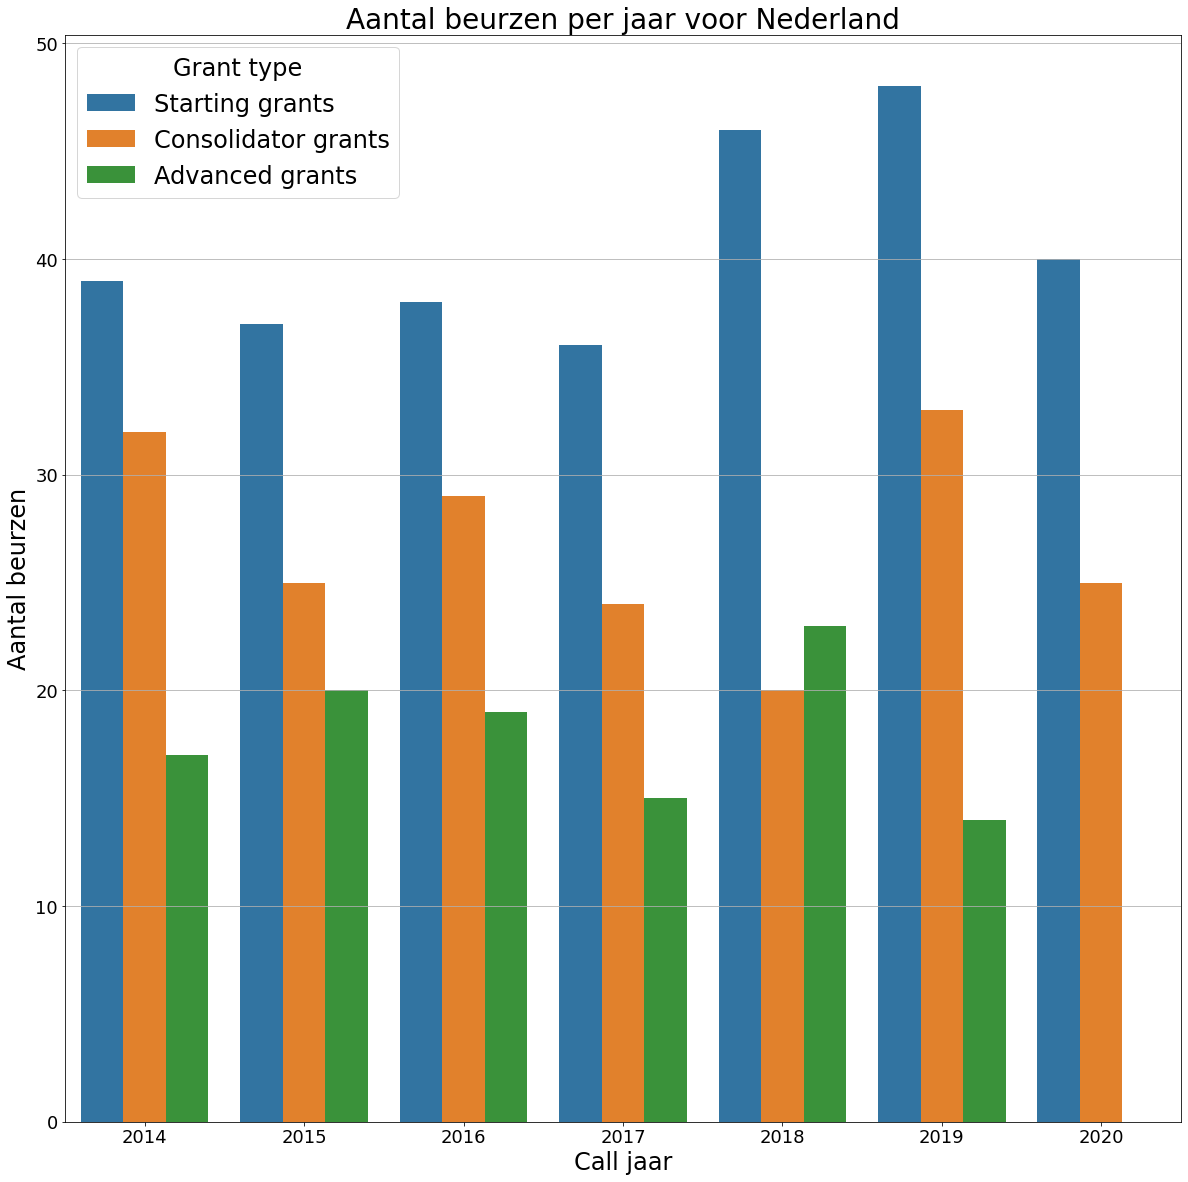

In [42]:
#Maak grafiek per jaar uitgesplitst naar de StG, CoG en AdG.   
plt.figure(figsize=(20,20))
sns.countplot(data=filterNLdf2, x="Call_year", order=["2014", "2015", "2016", "2017", "2018", "2019", "2020"], hue="Grant type");
plt.grid(axis = 'y')
plt.title("Aantal beurzen per jaar voor Nederland", fontsize=28)
plt.legend(title='Grant type', fontsize=24, title_fontsize=24)
plt.xlabel("Call jaar", fontsize=24)
plt.xticks(fontsize=18);
plt.ylabel("Aantal beurzen", fontsize=24);
plt.yticks(fontsize=18);

Hoe succesvol Nederland was kan ook worden bekeken door te kijken naar het behaalde budget per jaar. 

In [43]:
filterNLdf2.groupby("Call_year")['Project budget'].sum().astype(int)

Call_year
2014    160971315
2015    153638009
2016    161622981
2017    140694158
2018    163854140
2019    177035393
2020    111300246
Name: Project budget, dtype: int32

### Conclusie vraag
 Het lijkt erop dat de data voor de Advanced Grant van 2020 nog ontbreekt in de dataset. Deze data is waarschijnlijk te nieuw en nog niet toegevoegd. Ook in dat jaar waren er namelijk Advanced grants voor onderzoekers uit Nederland. 
 
De prestaties van Nederland zijn wisselend per jaar. Het meest succesvolle jaar in totaal was 2019, zowel in aantal beurzen als in budget. 2019 was wel minder succesvol dan gemiddeld voor de Advanced grant.
2017 was voor alle beurstypen minder succesvol dan gemiddeld. 